In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from datetime import datetime
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.offsets import Hour
from pandas.tseries.frequencies import to_offset
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf


In [2]:
#df = pd.read_csv('Wind_deseason.csv')
df = pd.read_csv('PV_deseason.csv', parse_dates=[0], index_col=0)

In [3]:
#AR model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

<Axes: xlabel='Date'>

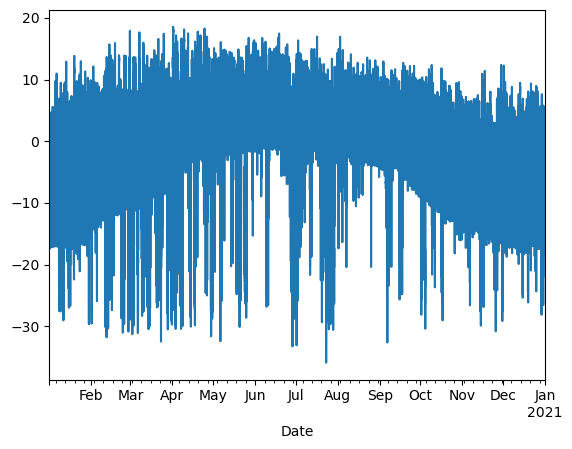

In [5]:
df['310_PV_1'].plot()

In [6]:
print(df.shape)
train=df.iloc[:len(df)-4]
test=df.iloc[len(df)-4:]
print(train.shape,test.shape)

(105408, 29)
(105404, 29) (4, 29)


In [7]:
mod = ARIMA(train['310_PV_1'], order = (3,0,20))
res = mod.fit()
print(res.summary())


C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               310_PV_1   No. Observations:               105404
Model:                ARIMA(3, 0, 20)   Log Likelihood             -217194.778
Date:                Tue, 02 May 2023   AIC                         434439.557
Time:                        11:32:44   BIC                         434678.696
Sample:                    01-01-2020   HQIC                        434511.959
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0669      0.185      5.754      0.000       0.703       1.430
ar.L1          0.8832      0.024     37.466      0.000       0.837       0.929
ar.L2         -0.7648      0.030    -25.898      0.0

In [8]:
start = len(train)
end = len(train)+len(test)-1
pred = res.predict(start = start, end = end)


<Axes: xlabel='Date'>

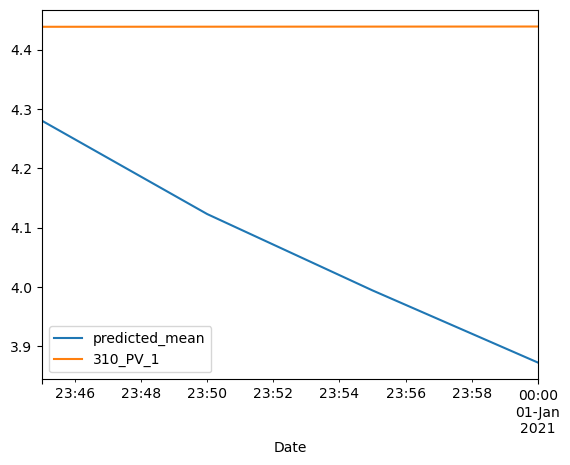

In [9]:

pred.plot(legend=True)
test['310_PV_1'].iloc[:31].plot(legend=True)


In [10]:
print(res.mle_retvals)

{'fopt': 2.0605933217776977, 'gopt': array([ 6.34594599e-06, -5.94063021e-04,  3.52506357e-03,  2.21880514e-04,
        4.38831087e-03, -1.04719033e-04, -2.61276956e-04, -1.23041932e-04,
        2.38325670e-04, -4.27239044e-04, -3.96127486e-04,  5.38274803e-04,
        2.98534886e-04, -7.28339833e-04, -3.80133480e-04,  5.76994497e-04,
       -1.90170102e-04, -6.42144826e-04,  1.76300130e-04,  4.68757255e-04,
       -3.60933905e-04, -6.42948184e-04,  2.85033153e-04,  8.70581385e-04,
        1.13225385e-03]), 'fcalls': 1768, 'warnflag': 1, 'converged': False, 'iterations': 50}


In [12]:
from sklearn.metrics import mean_squared_error


mean_squared_error(pred[0:4], test['310_PV_1'][0:4])

0.16068648786798617

In [13]:
mod = ARIMA(train['310_PV_1'], order = (5,1,5))
res = mod.fit()
print(res.summary())

C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               310_PV_1   No. Observations:               105404
Model:                 ARIMA(5, 1, 5)   Log Likelihood             -217270.569
Date:                Tue, 02 May 2023   AIC                         434563.138
Time:                        17:22:13   BIC                         434668.359
Sample:                    01-01-2020   HQIC                        434594.995
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5808      0.026    -22.632      0.000      -0.631      -0.531
ar.L2          0.5446      0.017     31.732      0.000       0.511       0.578
ar.L3          0.5812      0.022     26.292      0.0

In [14]:
start = len(train)
end = len(train)+len(test)-1
pred = res.predict(start = start, end = end)

<Axes: xlabel='Date'>

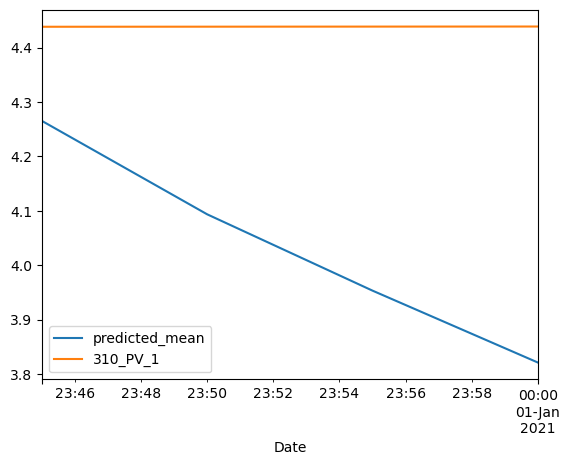

In [15]:
pred.plot(legend=True)
test['310_PV_1'].iloc[:31].plot(legend=True)

In [16]:
print(res.mle_retvals)

{'fopt': 2.061312370169702, 'gopt': array([ 1.35860696e-03, -1.73599402e-03, -5.49623325e-04,  1.93019023e-04,
       -8.95870134e-04, -9.37139255e-06,  1.08396838e-03,  2.85615975e-04,
       -1.06654596e-03,  3.30713457e-04, -2.03103871e-03]), 'fcalls': 696, 'warnflag': 1, 'converged': False, 'iterations': 50}


In [17]:
mean_squared_error(pred[0:4], test['310_PV_1'][0:4])

0.19163745956575873